<a href="https://colab.research.google.com/github/tamiratdereje/pishing-url-detection/blob/main/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Loading Data**


In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving urldata.csv to urldata.csv


In [4]:
allData = pd.read_csv(io.BytesIO(uploaded['urldata.csv']))
allData.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
allData.shape

(10000, 18)

In [6]:
allData.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

**Data Preprocessing**

```
# This is formatted as code
```



In [ ]:
allData.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [8]:
finalAnalysisData = allData.drop(['Domain'], axis = 1).copy()

In [9]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
finalAnalysisData = finalAnalysisData.sample(frac=1).reset_index(drop=True)
finalAnalysisData.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,8,0,0,0,0,1,1,1,1,0,0,1,1,1
1,0,0,1,4,0,0,0,1,0,1,0,1,0,0,1,0,1
2,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0
4,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,1


Splitting the Data
**bold text**


In [10]:
# features : X and target y
y = finalAnalysisData['Label']  
X = finalAnalysisData.drop('Label',axis=1)  

In [11]:
X.shape, y.shape

((10000, 16), (10000,))

In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((7000, 16), (3000, 16))

In [16]:
y_train.shape, y_test.shape

((7000,), (3000,))

** TrainingMachine Learning Models & Training**


We used **decision tree** to train the dataset .


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# Creating holders to store the model performance results
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(train_per,test_per):
  acc_train.append(round(train_per, 3))
  acc_test.append(round(test_per, 3))

**Decision Tree Classifier**

In [20]:
# importing Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation **

In [23]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.815


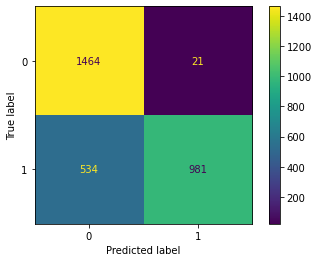

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cf = confusion_matrix(y_test, y_test_tree)

display = ConfusionMatrixDisplay(cf)
display.plot()
